In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

matplotlib.rcParams["font.size"] = 25
matplotlib.rcParams['figure.figsize'] = [10,10]

In [2]:
train_init = pd.read_csv('train.csv')
test_init = pd.read_csv('test.csv')

In [3]:
train_init.head() #show the first elements of the training sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_init.describe() #Show some relevant parameters of feature distributions

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
mask = train_init.isna().any()
col_nan = train_init.columns[mask] #fhese features contain NaN
print(col_nan)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [6]:
train_init[col_nan].isna().sum() #count the missing value for each feature

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

# Dataset inspection

Let us investigate which variables might be the most correlated with the sale price. We start with a heatmap:

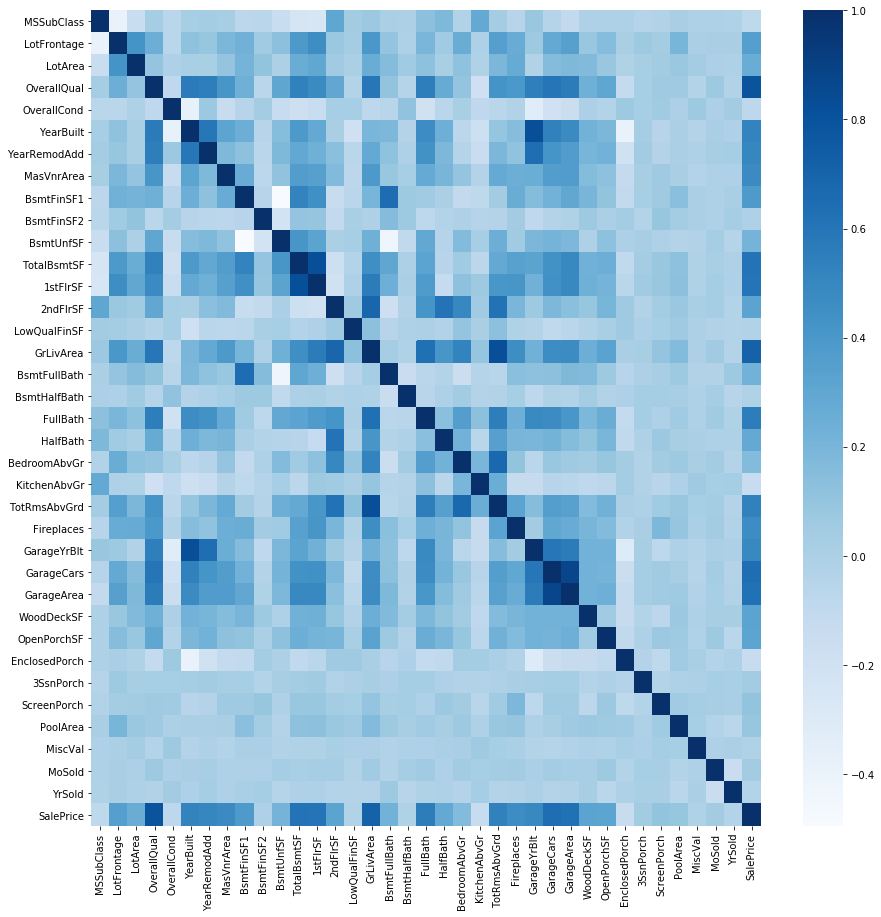

In [7]:
matplotlib.rcParams["font.size"] = 10
plt.figure(figsize= (15 , 15))
sns.heatmap(train_init.drop("Id", axis = 1).corr(),cmap="Blues")

From a first inspection, it seems that `OverallQual`, `GrLivArea`, and `GarageCars` are powerful features. Let us start considering real value features, and then discrete value ones

## Real Value Features

In [8]:
def make_scatter(varname1, varname2, ax):
    if np.average(train_init[varname2])>1000: train_init[varname2]=train_init[varname2]/1000.
    ax.scatter(train_init[varname1], train_init[varname2])
    ax.set_xlabel(varname1)
    ax.set_ylabel(varname2)

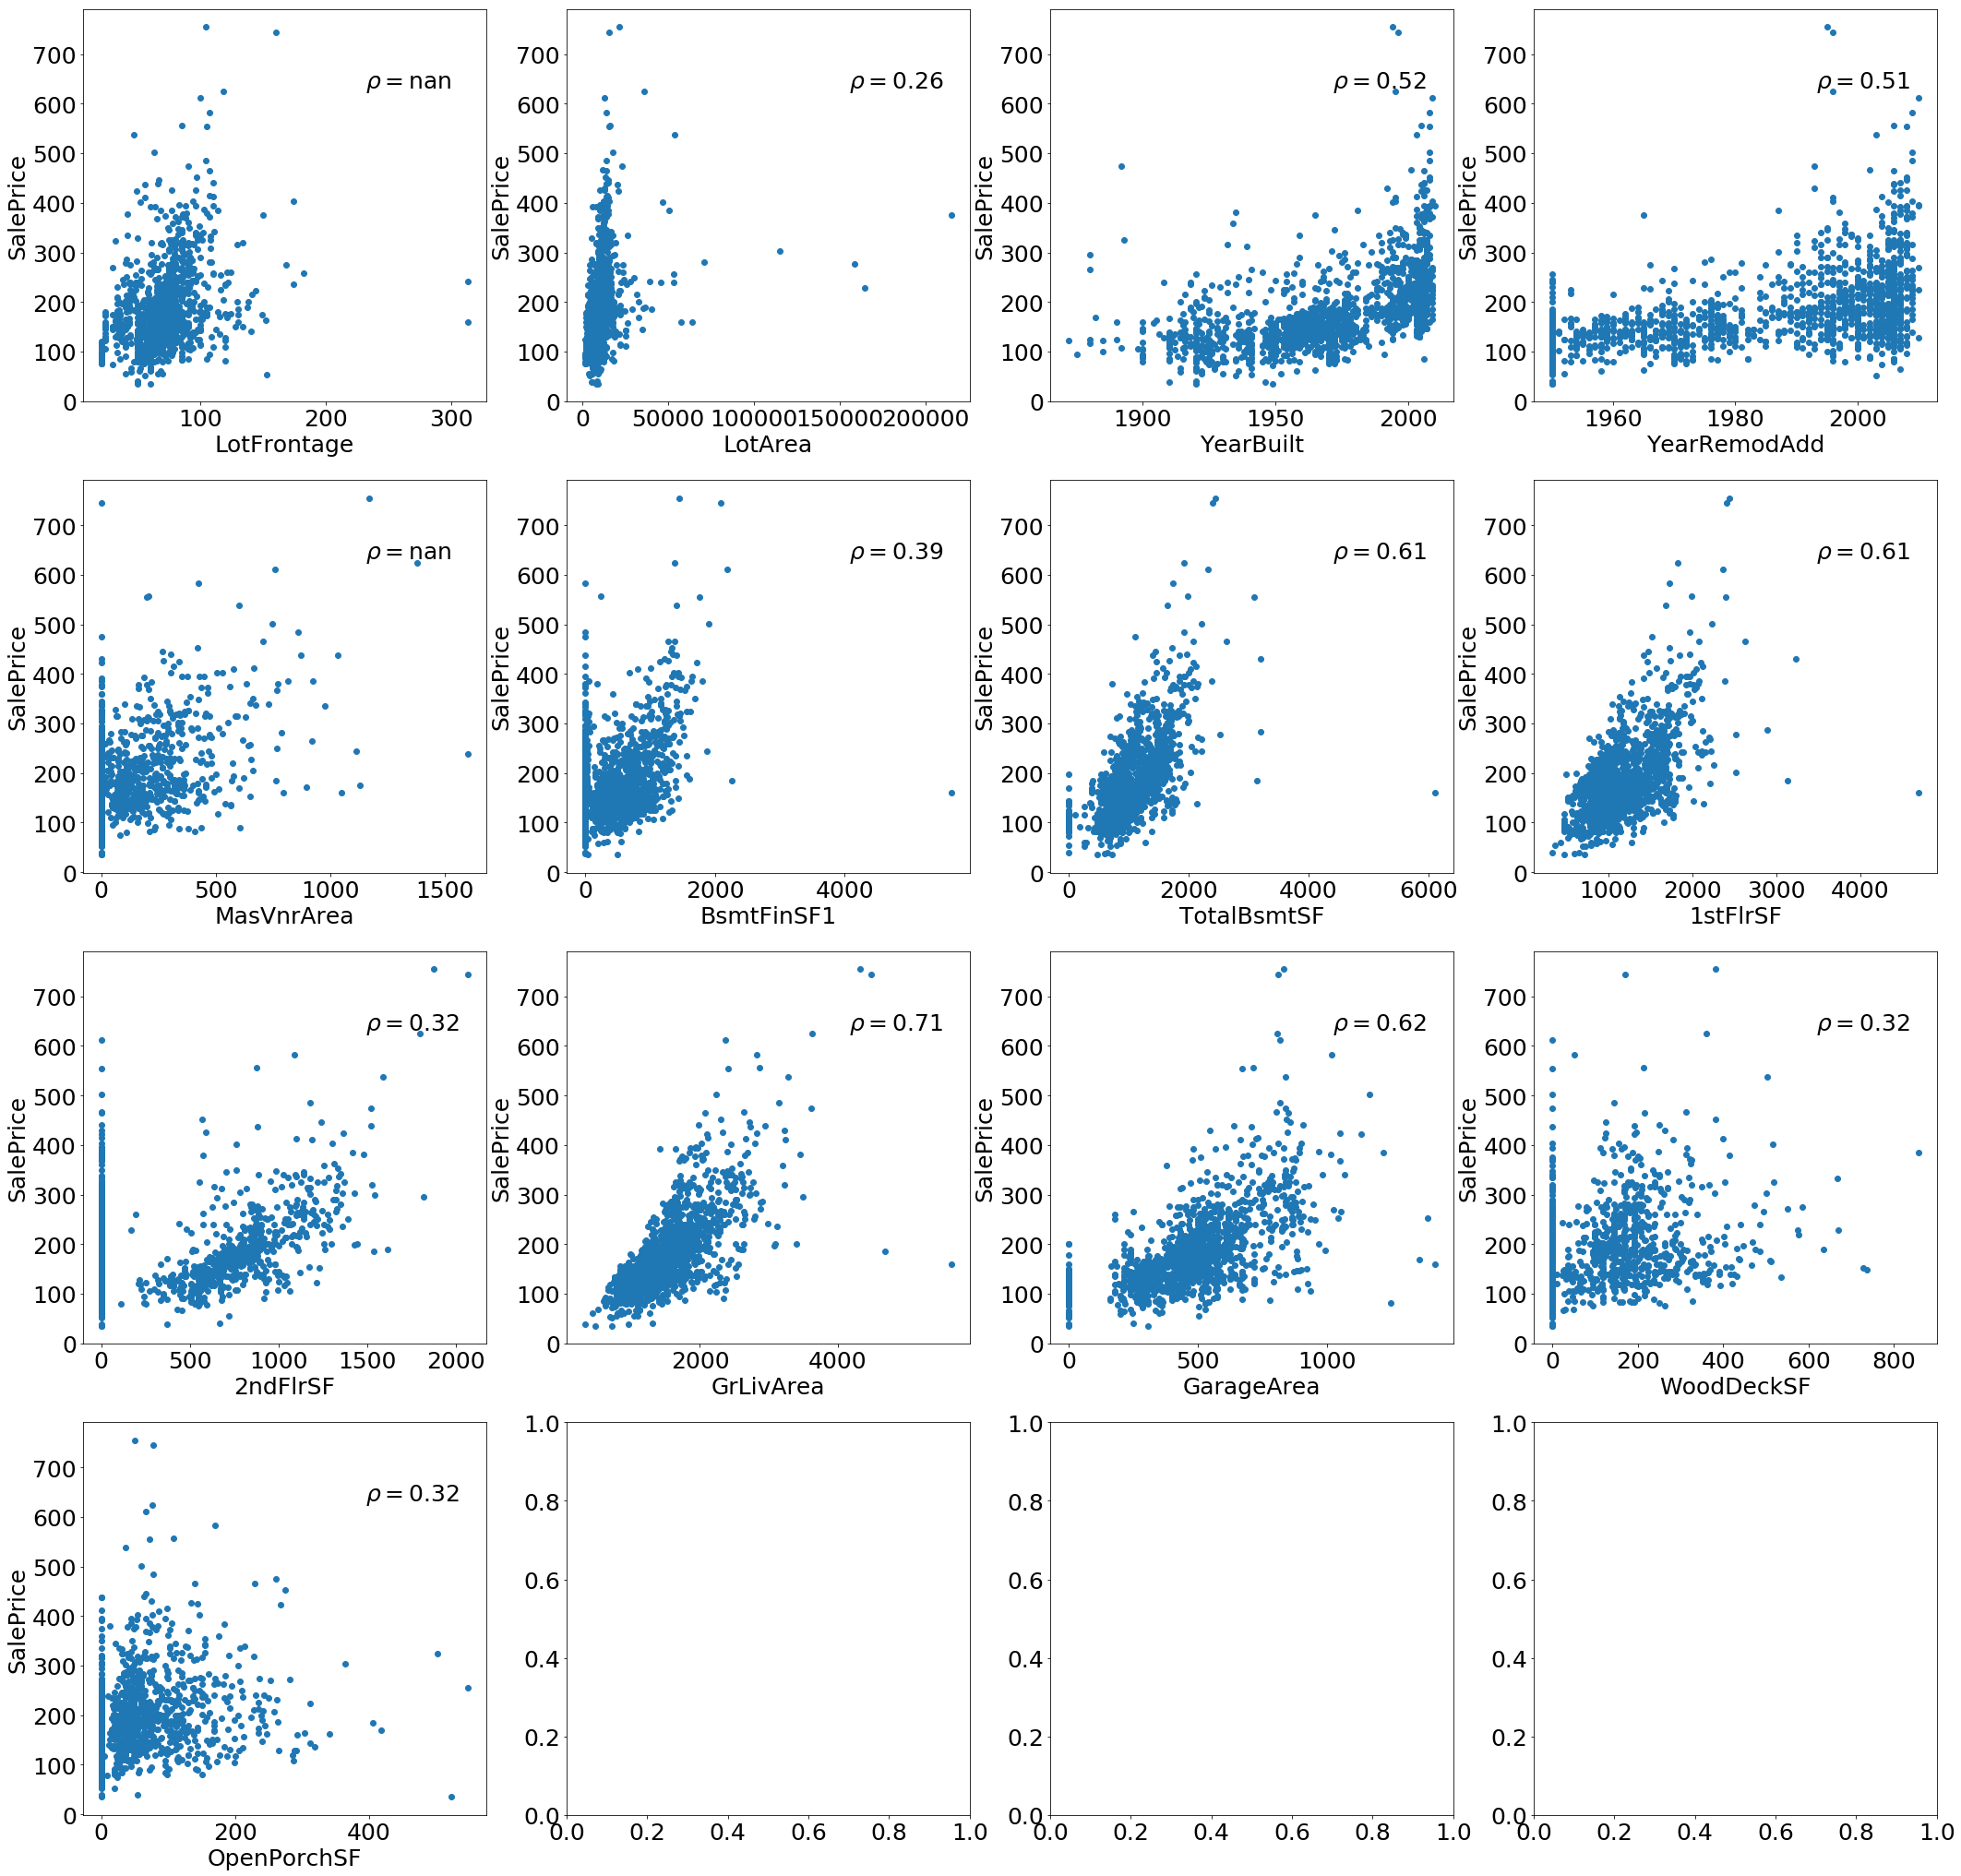

In [9]:
matplotlib.rcParams["font.size"] = 25

scatter_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
               'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
               '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
               'OpenPorchSF']
rho = []

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(36, 36))

for ivar, var in enumerate(scatter_var):
    row = int(ivar/4)
    col = ivar%4
    make_scatter(var, 'SalePrice', axs[row, col])
    rho.append(pearsonr(train_init[var], train_init['SalePrice'])[0])
    plt.text(0.7, 0.8, r'$\rho=${:.2f}'.format(rho[-1]), transform=axs[row, col].transAxes)

plt.show()

We observe that two features have $\rho=\mathrm{NaN}$, as a consequence of some NaN rows.

Some features show a high degree of correlation with the sale price (rho>60%). Neverthless, some might be cross-correlated, hence not providing much more information than a single feature. Below is the list of real-value features with the corresponding correlation

In [10]:
real_feat = pd.DataFrame({
    'variable': scatter_var,
    'rho': rho
})

real_feat.sort_values(by=['rho'], ascending=False)

,rho,variable
9,0.708624,GrLivArea
10,0.623431,GarageArea
6,0.613581,TotalBsmtSF
7,0.605852,1stFlrSF
2,0.522897,YearBuilt
3,0.507101,YearRemodAdd
5,0.386420,BsmtFinSF1
11,0.324413,WoodDeckSF
8,0.319334,2ndFlrSF
12,0.315856,OpenPorchSF


Now we want to check about possible cross-correlations among the 6 top variables ($\rho>50\%$)

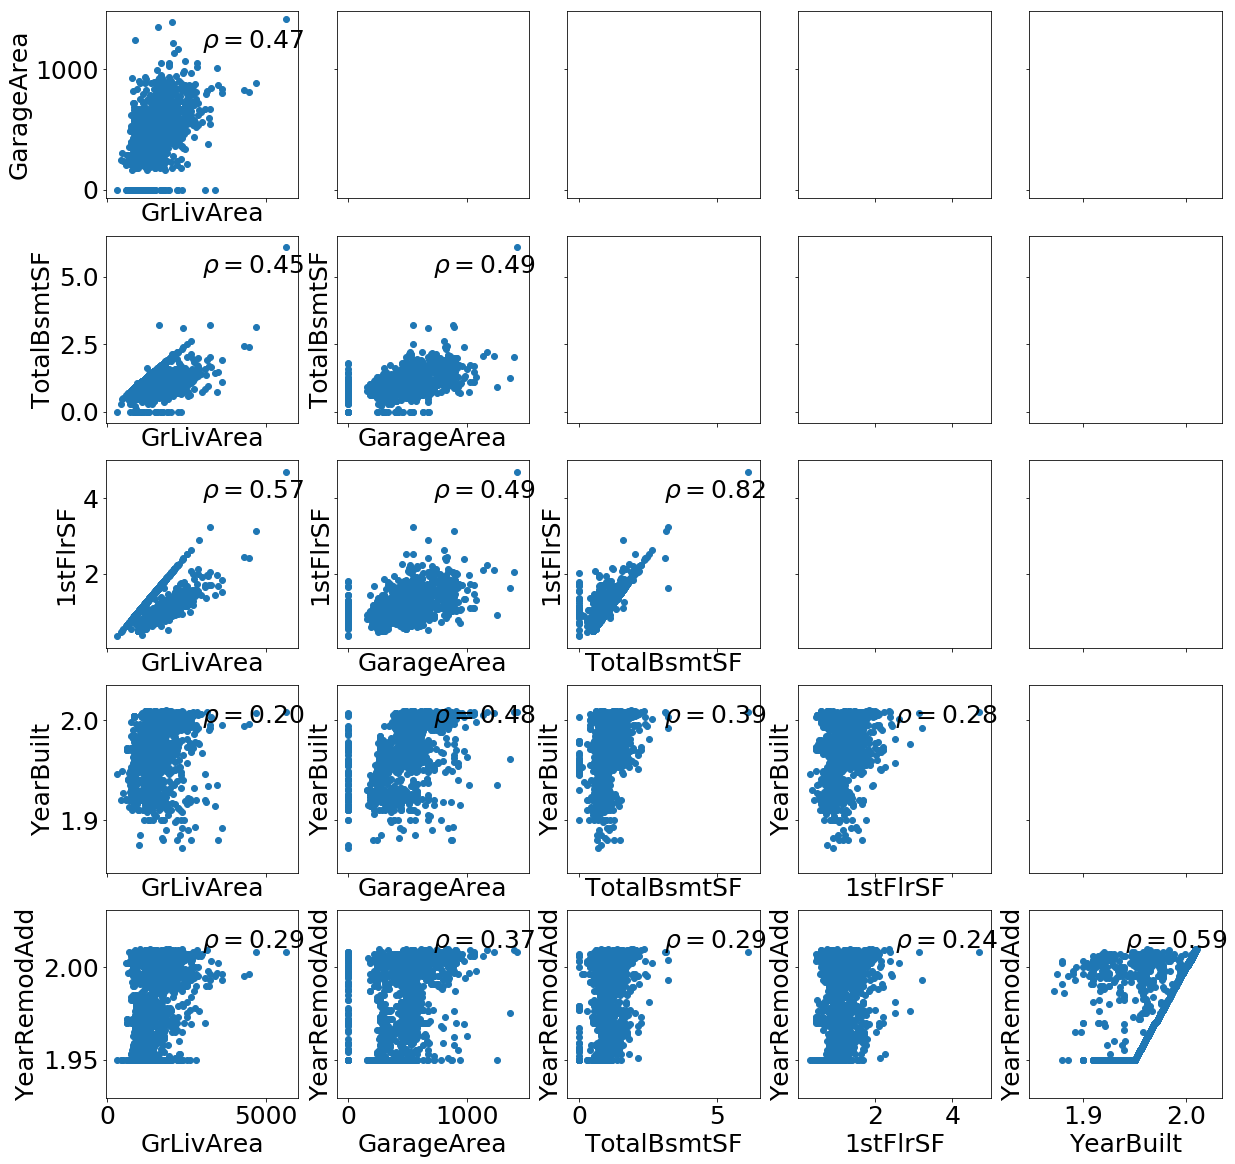

In [11]:
sel_var = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd']
n=len(sel_var)-1

fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(20, 20), sharex='col', sharey='row')

for i1, var1 in enumerate(sel_var):
    for i2, var2 in enumerate(sel_var):
        if i1>=i2: continue
        row = i2-1
        col = i1
        make_scatter(var1, var2, axs[row, col])
        plt.text(0.5, 0.8, r'$\rho=${:.2f}'.format(pearsonr(train_init[var1], train_init[var2])[0]),
                 transform=axs[row, col].transAxes)

plt.show()

We observe that `1stFlrSF` is highly cross-correlated with the other 3 variables, especially with `TotalBsmtSF`. We discard `1stFlrSF`. On the other hand, we see that `YearBuilt` is mostly uncorrelated with the other features. Thus, we might want to retain the following real-value variables:
 * GrLivArea
 * GarageArea
 * TotalBsmtSF
 * YearBuilt
 * YearRemodAdd